In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Classification/Weather.csv")
df.head()

,Outlook,Temp,Humidity,Windy,Play,Unnamed: 5
0,Rainy,Hot,High,f,no,NaN
1,Rainy,Hot,High,t,no,NaN
2,Overcast,Hot,High,f,yes,NaN
3,Sunny,Mild,High,f,yes,NaN
4,Sunny,Cool,Normal,f,yes,NaN


In [6]:
df.isna().sum()

Outlook        0
Temp           0
Humidity       0
Windy          0
Play           0
Unnamed: 5    14
dtype: int64

In [7]:
w = df.drop("Unnamed: 5",axis=1)

In [8]:
w.head()

,Outlook,Temp,Humidity,Windy,Play
0,Rainy,Hot,High,f,no
1,Rainy,Hot,High,t,no
2,Overcast,Hot,High,f,yes
3,Sunny,Mild,High,f,yes
4,Sunny,Cool,Normal,f,yes


In [9]:
w.tail()

,Outlook,Temp,Humidity,Windy,Play
9,Sunny,Mild,Normal,f,yes
10,Rainy,Mild,Normal,t,yes
11,Overcast,Mild,High,t,yes
12,Overcast,Hot,Normal,f,yes
13,Sunny,Mild,High,t,no


In [10]:
import pandas_profiling

In [11]:
# pandas_profiling.ProfileReport(w)

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
lb = LabelEncoder()

In [15]:
w['Outlook']= lb.fit_transform(w['Outlook'])
w

,Outlook,Temp,Humidity,Windy,Play
0,1,Hot,High,f,no
1,1,Hot,High,t,no
2,0,Hot,High,f,yes
3,2,Mild,High,f,yes
4,2,Cool,Normal,f,yes
5,2,Cool,Normal,t,no
6,0,Cool,Normal,t,yes
7,1,Mild,High,f,no
8,1,Cool,Normal,f,yes
9,2,Mild,Normal,f,yes


In [16]:
w['Temp'] = lb.fit_transform(w['Temp'])
w

,Outlook,Temp,Humidity,Windy,Play
0,1,1,High,f,no
1,1,1,High,t,no
2,0,1,High,f,yes
3,2,2,High,f,yes
4,2,0,Normal,f,yes
5,2,0,Normal,t,no
6,0,0,Normal,t,yes
7,1,2,High,f,no
8,1,0,Normal,f,yes
9,2,2,Normal,f,yes


In [17]:
w['Humidity'] = lb.fit_transform(w['Humidity'])
w

,Outlook,Temp,Humidity,Windy,Play
0,1,1,0,f,no
1,1,1,0,t,no
2,0,1,0,f,yes
3,2,2,0,f,yes
4,2,0,1,f,yes
5,2,0,1,t,no
6,0,0,1,t,yes
7,1,2,0,f,no
8,1,0,1,f,yes
9,2,2,1,f,yes


In [18]:
w['Windy'] = lb.fit_transform(w['Windy'])
w

,Outlook,Temp,Humidity,Windy,Play
0,1,1,0,0,no
1,1,1,0,1,no
2,0,1,0,0,yes
3,2,2,0,0,yes
4,2,0,1,0,yes
5,2,0,1,1,no
6,0,0,1,1,yes
7,1,2,0,0,no
8,1,0,1,0,yes
9,2,2,1,0,yes


In [19]:
x= w.drop('Play',axis=1)
x

,Outlook,Temp,Humidity,Windy
0,1,1,0,0
1,1,1,0,1
2,0,1,0,0
3,2,2,0,0
4,2,0,1,0
5,2,0,1,1
6,0,0,1,1
7,1,2,0,0
8,1,0,1,0
9,2,2,1,0


In [20]:
w['Play'] = lb.fit_transform(w['Play'])
w

,Outlook,Temp,Humidity,Windy,Play
0,1,1,0,0,0
1,1,1,0,1,0
2,0,1,0,0,1
3,2,2,0,0,1
4,2,0,1,0,1
5,2,0,1,1,0
6,0,0,1,1,1
7,1,2,0,0,0
8,1,0,1,0,1
9,2,2,1,0,1


In [21]:
y = w['Play']
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play, dtype: int32

In [80]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [81]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((10, 4), (10,), (4, 4), (4,))

In [82]:
from sklearn.naive_bayes import BernoulliNB

In [83]:
bnb = BernoulliNB()

In [84]:
bnb.fit(x_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [85]:
yhat = bnb.predict(x_test)
yhat

array([0, 1, 1, 0])

In [86]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report,accuracy_score,plot_roc_curve

In [87]:
cm = confusion_matrix(y_test,yhat)
cm

array([[1, 0],
       [1, 2]], dtype=int64)

In [88]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



In [89]:
accuracy_score(y_test,yhat)

0.75

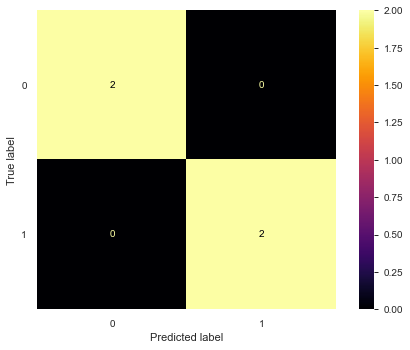

In [90]:
plot_confusion_matrix(bnb,x_test,yhat,cmap="inferno")

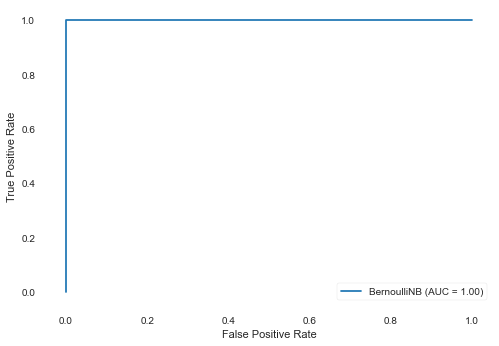

In [91]:
plot_roc_curve(bnb,x_test,yhat)

In [120]:
from sklearn.naive_bayes import MultinomialNB,CategoricalNB,ComplementNB,GaussianNB

In [93]:
mnb = MultinomialNB()

In [94]:
mnb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [95]:
mnb_yhat = mnb.predict(x_test)
mnb_yhat

array([0, 1, 1, 0])

In [96]:
cm = confusion_matrix(y_test,mnb_yhat)
cm

array([[1, 0],
       [1, 2]], dtype=int64)

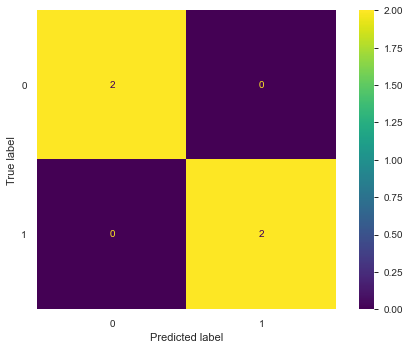

In [97]:
plot_confusion_matrix(mnb,x_test,mnb_yhat)

In [98]:
print(classification_report(y_test,mnb_yhat))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



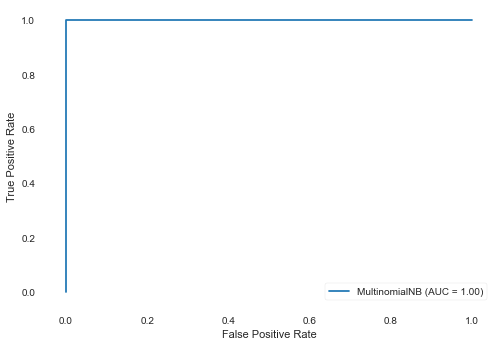

In [99]:
plot_roc_curve(mnb,x_test,mnb_yhat)

In [121]:
cnb = CategoricalNB()

In [122]:
cnb.fit(x_train,y_train)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [123]:
cnb_yhat = cnb.predict(x_test)
cnb_yhat

array([1, 1, 1, 1])

In [124]:
cm = confusion_matrix(y_test,cnb_yhat)
cm

array([[0, 1],
       [0, 3]], dtype=int64)

In [125]:
print(classification_report(y_test,cnb_yhat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


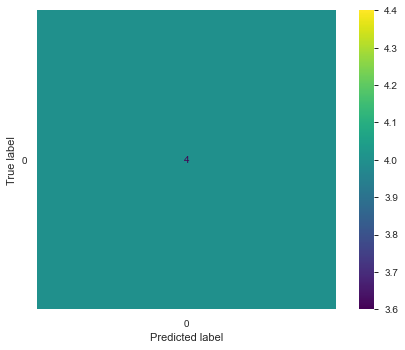

In [126]:
plot_confusion_matrix(cnb,x_test,cnb_yhat)

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_ranking.py:800: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


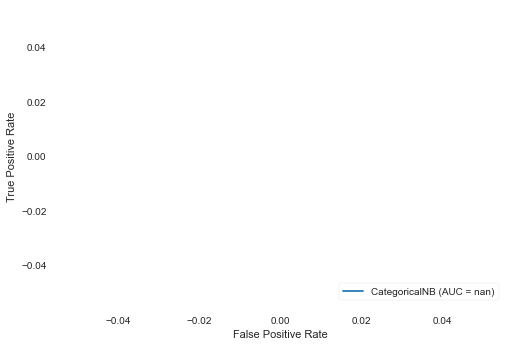

In [127]:
plot_roc_curve(cnb,x_test,cnb_yhat)

In [128]:
gb = GaussianNB()

In [129]:
gb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [130]:
gb_yhat = gb.predict(x_test)
gb_yhat

array([0, 1, 1, 1])

In [131]:
cm = confusion_matrix(y_test,gb_yhat)
cm

array([[1, 0],
       [0, 3]], dtype=int64)

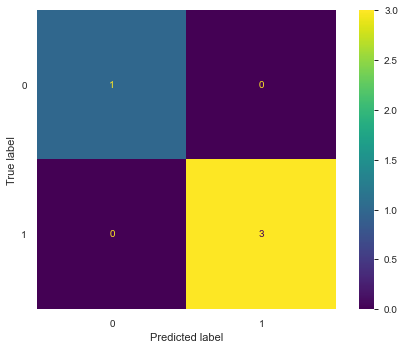

In [132]:
plot_confusion_matrix(gb,x_test,gb_yhat)

In [133]:
print(classification_report(y_test,gb_yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



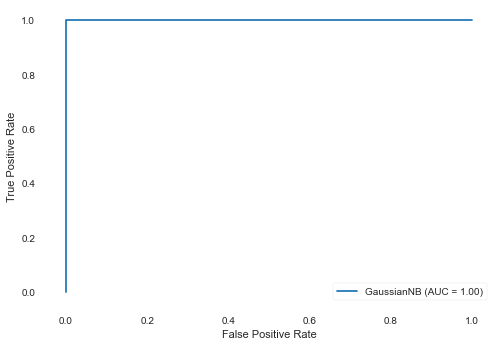

In [134]:
plot_roc_curve(gb,x_test,gb_yhat)

In [135]:
cmb = ComplementNB()

In [136]:
cmb.fit(x_train,y_train)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [137]:
cmb_yhat = cmb.predict(x_test)
cmb_yhat

array([0, 1, 0, 0])

In [138]:
cm = confusion_matrix(y_test,cmb_yhat)
cm

array([[1, 0],
       [2, 1]], dtype=int64)

In [139]:
accuracy_score(y_test,cmb_yhat)

0.5

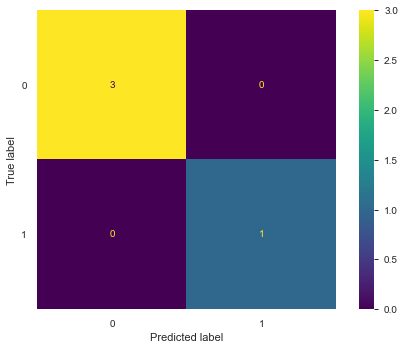

In [140]:
plot_confusion_matrix(cmb,x_test,cmb_yhat)

In [141]:
print(classification_report(y_test,cmb_yhat))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.33      0.50         3

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4



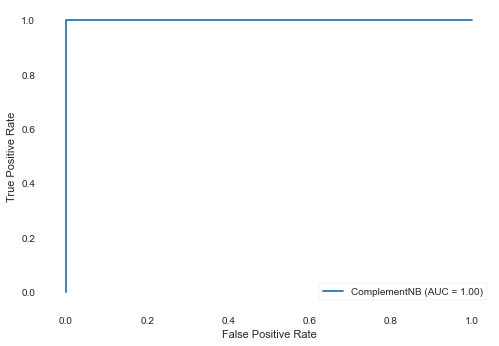

In [142]:
plot_roc_curve(cmb,x_test,cmb_yhat)

In [143]:
from sklearn.model_selection import cross_val_score


In [145]:
models = [cmb,gb,cnb,mnb,bnb]
for i in models:
    cv = cross_val_score(i,x_train,y_train,cv=4)
    print("Model name",i)
    print("Model score",i.score(x_test,yhat))
    #print("Accuracy score",i.accuracy_score(y_test,[yhat,cmb_yhat,gb_yhat,cnb_yhat,mnb_yhat]))
    print("*"*30)

Model name ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)
Model score 0.75
******************************
Model name GaussianNB(priors=None, var_smoothing=1e-09)
Model score 0.75
******************************
Model name CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)
Model score 0.5
******************************
Model name MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Model score 1.0
******************************
Model name BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Model score 1.0
******************************
